# Importing The Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Loading the Dataset

In [4]:
df = pd.read_csv("C:\\Users\\abhis\\Downloads\\diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
# Column Descriptions.

# Target Variable(Output):- 

# Outcome:-  This is the target variable(what we want to predict).
# Value 0 → Person does NOT have diabetes
# Value 1 → Person HAS diabetes
# This is a binary classification problem.
# The SVM model learns patterns from input features to correctly predict this column.
# During training, SVM tries to draw a boundary (hyperplane) that separates 0 and 1 values.
# All other columns are used to predict this Outcome.

# Input Features(Independent Variables):-
#1)Pregnancies :- Number of times a woman has been pregnant.
# More pregnancies may increase diabetes risk (especially gestational diabetes).
# It is a numerical feature.
# SVM uses this to help separate diabetic and non-diabetic cases.
# Alone it cannot predict diabetes, but combined with other features it helps.

#2) Glucose :- Blood glucose level after a Glucose Test.
# This is the most important feature.
# High glucose level strongly indicates diabetes.
# SVM mainly uses this feature to separate the two classes.
# Higher glucose → higher chance of Outcome = 1.

#3) BloodPressure :- Diastolic blood pressure (mm Hg).
# High blood pressure is related to diabetes risk.
# It supports prediction but is not the strongest feature.
# Works together with BMI and age in classification.

#4) SkinThickness :- Measures body fat (triceps skin fold thickness).
# Higher value may indicate obesity.
# Obesity increases diabetes risk.
# Helps improve model accuracy when combined with BMI.

#5) Insulin :- Insulin level in blood.
# Insulin controls blood sugar.
# Abnormal insulin levels may indicate diabetes.
# Adds important medical information for classification.
# Sometimes contains missing values (zeros).

#6) BMI(Body Mass Index) :- Indicates body weight based on height.
# Higher BMI = overweight or obese.
# Obesity is a strong risk factor for diabetes.
# One of the important features in prediction.

#7) DiabetesPedigreeFunction :- Shows genetic (family) history of diabetes.
# Higher value = stronger family history.
# Helps detect people who are genetically at risk.
# Useful when glucose is borderline.

#8) Age :- Age of the person.
# Risk of diabetes increases with age.
# Older people are more likely to have diabetes.
# Helps SVM improve classification boundary.

# Therefore, The SVM model: Takes 8 medical details(Input Features), Learns Patterns and Predicts whether the person has Diabetes(1) or not(0).


# EDA On the Dataset

In [7]:
df.head() # Printing first 5 Rows of the dataset.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail() # Printing Last 5 Rows of the dataset.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# No. of rows and columns in the dataset.
df.shape

(768, 9)

In [10]:
# Getting the infornmation about the columns of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Summary Statistics of the Numerical columns of Dataset.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df['Outcome'].value_counts()# No. of Persons Having Diabetes as a disease and no. of persons not having diabetes as a disease
# From the Output, it is clear that 268 persons are having the disease as diabetes
# 0------> Non- Diabetic
# 1------> Diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
df.groupby('Outcome').mean()
# Finding the mean of the different numerical columns of the dataset based on diabetic and non - diabetic 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
# Check for duplicate rows
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [17]:
# Check for duplicate rows with summing up the duplicate record rows
df.duplicated().sum()

0

In [18]:
# Check for missing values of each column.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualizing the Target Variable

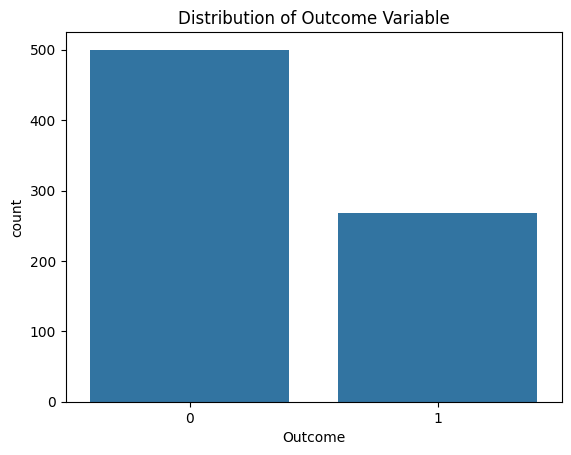

In [19]:
# Count plot of the target variable
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome Variable")
plt.show()

# Visualizing Feature Distributions

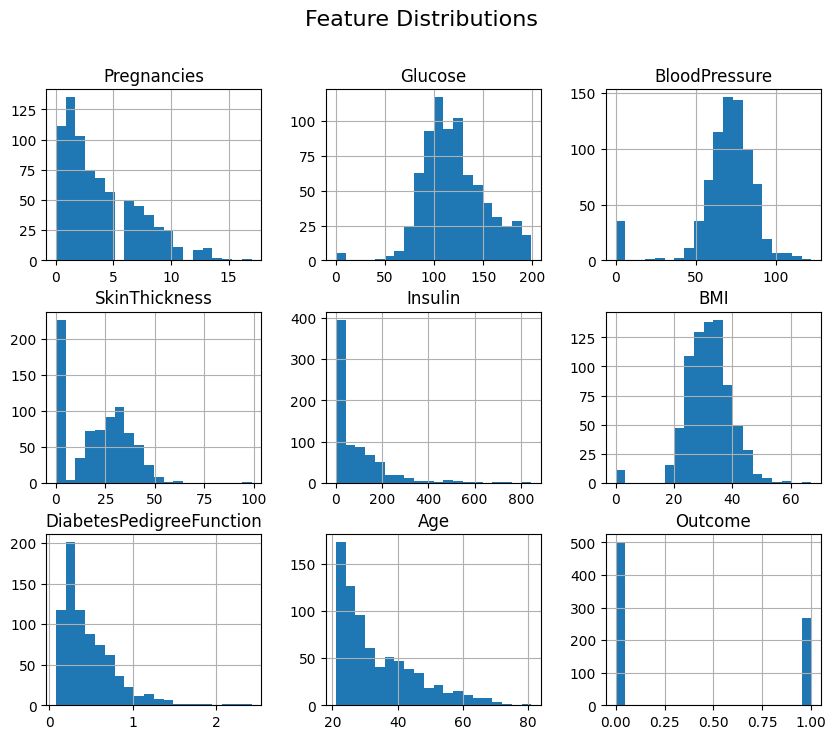

In [20]:
# Plot histograms for numerical features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


# Correlation Heatmap

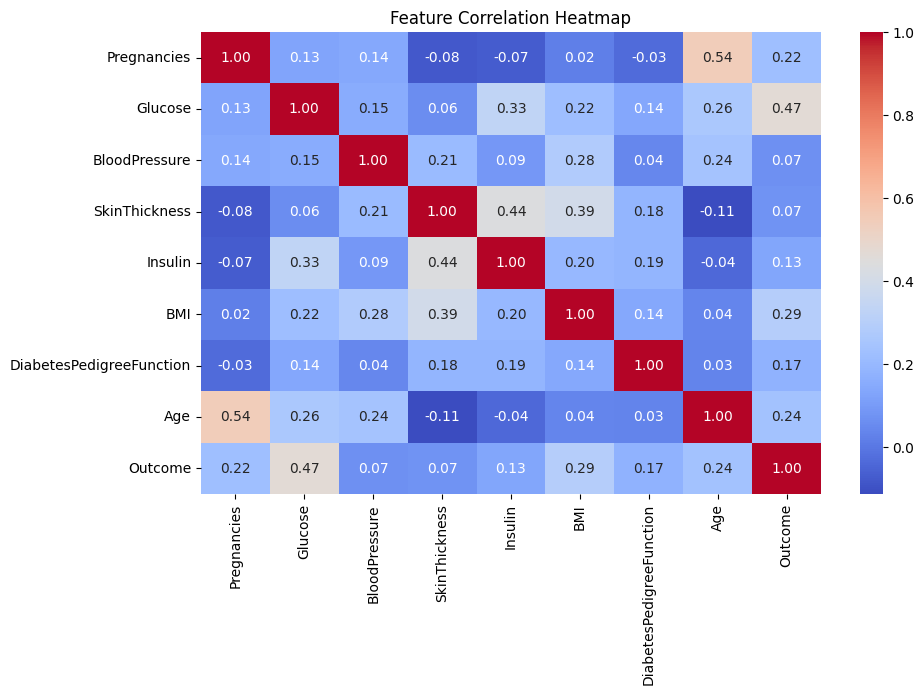

In [21]:
# Heatmap to check feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature Engineering

# Handling Zero Values

In [22]:
# Columns where zero values should be treated as missing
zero_replace_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
df[zero_replace_columns] = df[zero_replace_columns].replace(0, np.nan)

# Fill missing values with column medians
df.fillna(df.median(), inplace=True)


# Feature Scaling using StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Define feature set (excluding 'Outcome')
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Implement SVM Machine Learning Algorithm



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

## Model Evaluation Metrics

# Accuracy Measures of SVM Algorithm

In [28]:
from sklearn.metrics import accuracy_score

# Make Predictions on Training Data
y_train_pred = svm_model.predict(X_train)

# Calculate Training Accuracy.
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training data : ", train_accuracy)

Accuracy on Training data :  0.7671009771986971


1) The model was trained using Training Data.
2) Accuracy ≈ 77%
3) This means that the model correctly predicted about 77 out of 100 transactions in the training dataset.

In [29]:
# Make predictions on Testing Data
y_test_pred = svm_model.predict(X_test)

# Calculate Testing Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score on Test Data : ", test_accuracy)


Accuracy score on Test Data :  0.7532467532467533


1) Test data was not seen by the model before.

2)  Accuracy ≈ 75%.
   
3)  This means that the model correctly predicted about 75 out of 100 unseen Transactions.

## Making a Predictive System

In [33]:
# New Input Data (one person)
input_data = (5,166,72,19,175,25.8,0.587,51)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array (1 sample, 8 features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler
std_data = scaler.transform(input_data_reshaped)

# Make Prediction using trained SVM model
prediction = svm_model.predict(std_data)

# Print Prediction
print("Prediction Value :", prediction)

# Print Final Result
if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

Prediction Value : [1]
The person is diabetic


C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
